In [ ]:
# pip install pyreadstat

In [ ]:
# import pyreadstat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# kxr_sq_bu00.csv
df3 = pd.read_csv('drive/MyDrive/KneeOA_final_datasets/kxr_sq_bu00.csv')

In [ ]:
len(df3['V00XRKL'])

12813

In [ ]:
df3['V00XRKL'].isna().sum()

62

In [ ]:
df3.head()

,ID,SIDE,READPRJ,VERSION,V00BARCDBU,V00XROSFM,V00XRSCFM,V00XRCYFM,V00XRJSM,V00XRCHM,...,V00XRKL,V00XROSFL,V00XRSCFL,V00XRCYFL,V00XRJSL,V00XRCHL,V00XROSTL,V00XRSCTL,V00XRCYTL,V00XRATTL
0,9000099,1,15,0.8,1.660084e+10,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,9000099,2,15,0.8,1.660084e+10,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,2.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
2,9000296,1,15,0.8,1.660018e+10,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9000296,2,15,0.8,1.660018e+10,0.0,0.0,0.0,2.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9000622,1,15,0.8,1.660083e+10,NaN,NaN,NaN,0.0,NaN,...,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df = pd.DataFrame(data, columns=['Numbers'])\
# kl_grade = pd.DataFrame(data, columns=['Numbers'])
i = 0
kl = []
for i in range(4507):
  kl.append([])
count = 0
df3 = df3[['V00XRKL','SIDE', 'ID']]
i = 0
count = 0
while i < len(df3):
    id = df3.loc[i, 'ID']
    side1, side2 = 0, 0
    kl[count].append(str(id))
    while df3.loc[i, 'ID'] == id:
      if df3.loc[i, 'SIDE'] == 1 and side1 == 0:
        kl[count].append(df3.loc[i, 'V00XRKL'])
        side1 += 1
      if df3.loc[i, 'SIDE'] == 2 and side2 == 0:
        kl[count].append(df3.loc[i, 'V00XRKL'])
        side2 += 1
      i += 1
      if i >= len(df3):
        break
    # print(id, kl[count])
    count += 1
print(count, kl)
# for i in df3:
#   print(i)
  # break
  # count = 0
  # if df3['SIDE'] == 1:
  #   kl[count].append(df3['V00XRKL'])
  # if
  # count += 1

print(len(df3['ID'].unique()))

4507 [['9000099', 2.0, 3.0], ['9000296', 2.0, 3.0], ['9000622', 1.0, 1.0], ['9000798', 1.0, 4.0], ['9001104', 3.0, 1.0], ['9001400', 1.0, 1.0], ['9001695', 2.0, 0.0], ['9001897', 3.0, 0.0], ['9002116', 2.0, 3.0], ['9002316', 1.0, 1.0], ['9002411', 2.0, 2.0], ['9002430', 2.0, 3.0], ['9002817', 3.0, 2.0], ['9003126', 0.0, 0.0], ['9003175', 0.0, 0.0], ['9003316', 2.0, 0.0], ['9003380', 1.0, 1.0], ['9003406', 2.0, 2.0], ['9003430', 1.0, 0.0], ['9003658', 0.0, 0.0], ['9003815', 0.0, 0.0], ['9003895', 2.0, 2.0], ['9004175', 2.0, 1.0], ['9004184', 0.0, 1.0], ['9004315', 0.0, 0.0], ['9004669', 0.0, 0.0], ['9004905', 2.0, 2.0], ['9005075', 0.0, 0.0], ['9005132', 1.0, 4.0], ['9005321', 0.0, 0.0], ['9005413', 0.0, 0.0], ['9005656', 0.0, 0.0], ['9006140', 0.0, 0.0], ['9006407', 2.0, 0.0], ['9006723', 1.0, 2.0], ['9007827', 2.0, 2.0], ['9007904', 0.0, 0.0], ['9008322', 1.0, 3.0], ['9008561', 1.0, 1.0], ['9008820', 0.0, 0.0], ['9008884', 2.0, 2.0], ['9008934', 1.0, 1.0], ['9009067', 0.0, 0.0], ['900

In [ ]:
print(type(kl[0][0]))

<class 'str'>


In [ ]:
kl_grade = pd.DataFrame(kl, columns=['ID', 'kl_right', 'kl_left'])
kl_grade.head()

,ID,kl_right,kl_left
0,9000099,2.0,3.0
1,9000296,2.0,3.0
2,9000622,1.0,1.0
3,9000798,1.0,4.0
4,9001104,3.0,1.0


In [ ]:
kl_grade['ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4507 entries, 0 to 4506
Series name: ID
Non-Null Count  Dtype 
--------------  ----- 
4507 non-null   object
dtypes: object(1)
memory usage: 35.3+ KB


In [ ]:
len(df3['ID'].unique())

4507

In [ ]:
for i in df3:
  print(i)

V00XRKL
SIDE
ID


In [ ]:
df1 = pd.read_sas('drive/MyDrive/KneeOA_final_datasets/allclinical00.sas7bdat')
df2 = pd.read_sas('drive/MyDrive/KneeOA_final_datasets/enrollees.sas7bdat')
df = pd.read_sas('drive/MyDrive/KneeOA_final_datasets/allclinical00.sas7bdat')
df.head()

,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,...,V00PASE4,V00PASE4HR,V00PASE5,V00PASE5HR,V00PASE6,V00PASE6HR,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT
0,b'9000099',b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,3.0,1.0,2.0,1.0,52.0,50.0,1.0,1.0
1,b'9000296',b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,52.0,50.0,1.0,2.0
2,b'9000622',b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN
3,b'9000798',b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,52.0,40.0,1.0,3.0
4,b'9001104',b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,3.0,1.0,NaN,0.0,0.0,NaN


In [ ]:
df['P02HISP'] = df2['P02HISP']
df['P02RACE'] = df2['P02RACE']
df['P02SEX'] = df2['P02SEX']
df['V00CHRTHLF'] =  df2['V00CHRTHLF']

<ipython-input-219-555ffe94a43c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['P02HISP'] = df2['P02HISP']
<ipython-input-219-555ffe94a43c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['P02RACE'] = df2['P02RACE']
<ipython-input-219-555ffe94a43c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [ ]:
# print(int(kl[0][0]).to_bytes(2, byteorder='little'))

In [ ]:
df.loc[0, 'ID']

b'9000099'

In [ ]:
df3[df3['ID'] == 9000296]

,V00XRKL,SIDE,ID
2,2.0,1,9000296
3,3.0,2,9000296


In [ ]:
df[df['ID'] == 9999862]

,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,...,V00PASE6,V00PASE6HR,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT,P02HISP,P02RACE,P02SEX,V00CHRTHLF


In [ ]:
df.loc[4000]

ID            b'9834533'
VERSION         b'0.2.3'
V00BLDCOLL           1.0
V00BLDHRS1       33600.0
V00BLDHRS2           NaN
                 ...    
V00WORKAMT           1.0
P02HISP              0.0
P02RACE              1.0
P02SEX               1.0
V00CHRTHLF           2.0
Name: 4000, Length: 1191, dtype: object

In [ ]:
kl_grade.iloc[12]

ID          9002817
kl_right        3.0
kl_left         2.0
Name: 12, dtype: object

In [ ]:
for i in range(len(df)):
  if str(df.loc[i, 'ID'])[2:-1] != str(kl_grade.loc[i, 'ID']):
    print(int(str(df.loc[i, 'ID'])[2:-1]), str(kl_grade.loc[i, 'ID']))
    print(i)
    break
    # x = df.loc[i, 'ID']
    # x= int.from_bytes(x, byteorder='little', signed=False)
    # print(x)
    # break

9002663 9002817
12


In [ ]:
count = 0
for i in range(len(df)):
  x = kl_grade[kl_grade['ID'] == str(df.loc[i, 'ID'])[2:-1]]
  # print(x, len(x))
  if (not len(x)):
    df = df.drop(i)
    count += 1
  # if count == 20:
  #   break
print(count)
print(len(df['ID']))

289
4507


In [ ]:
df = df.reset_index()
df.head()

,index,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V00PASE6,V00PASE6HR,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT,P02HISP,P02RACE,P02SEX,V00CHRTHLF
0,0,b'9000099',b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,2.0,1.0,52.0,50.0,1.0,1.0,0.0,1.0,1.0,2.0
1,1,b'9000296',b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,52.0,50.0,1.0,2.0,0.0,1.0,1.0,1.0
2,2,b'9000622',b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0
3,3,b'9000798',b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,52.0,40.0,1.0,3.0,0.0,1.0,1.0,1.0
4,4,b'9001104',b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,...,3.0,1.0,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0


In [ ]:
a = 0
for i in range(len(df)):
  # print(df.loc[i, 'ID'])
  df.loc[i, 'ID'] = str(df.loc[i, 'ID'])[2:-1]
  # a += 1
  # if a == 20:
    # break
  # print(a)

In [ ]:
df.head()

,index,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V00PASE6,V00PASE6HR,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT,P02HISP,P02RACE,P02SEX,V00CHRTHLF
0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,2.0,1.0,52.0,50.0,1.0,1.0,0.0,1.0,1.0,2.0
1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,52.0,50.0,1.0,2.0,0.0,1.0,1.0,1.0
2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0
3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,52.0,40.0,1.0,3.0,0.0,1.0,1.0,1.0
4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,...,3.0,1.0,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0


In [ ]:
count = 0
for i in range(len(df)):
  # print(type(df.loc[i, 'ID']), type(kl_grade.loc[i, 'ID']))
  # break
  if df.loc[i, 'ID'] != kl_grade.loc[i, 'ID']:
    count += 1
print(count)

0


In [ ]:
df['kl_left'] = kl_grade['kl_left']
df['kl_right'] = kl_grade['kl_right']

In [ ]:
df.head(10)

,index,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT,P02HISP,P02RACE,P02SEX,V00CHRTHLF,kl_left,kl_right
0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,52.0,50.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,2.0
1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,...,52.0,50.0,1.0,2.0,0.0,1.0,1.0,1.0,3.0,2.0
2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0,1.0,1.0
3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,...,52.0,40.0,1.0,3.0,0.0,1.0,1.0,1.0,4.0,1.0
4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0,1.0,3.0
5,5,9001400,b'0.2.3',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,2.0,1.0,1.0,1.0
6,6,9001695,b'0.2.3',1.0,29700.0,NaN,1.0,NaN,NaN,NaN,...,52.0,40.0,1.0,3.0,0.0,1.0,2.0,1.0,0.0,2.0
7,7,9001897,b'0.2.3',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,3.0
8,8,9002116,b'0.2.3',1.0,25800.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,2.0,1.0,2.0,3.0,2.0
9,9,9002316,b'0.2.3',1.0,29400.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
kl_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        4507 non-null   object 
 1   kl_right  4470 non-null   float64
 2   kl_left   4483 non-null   float64
dtypes: float64(2), object(1)
memory usage: 105.8+ KB


In [ ]:
len(df2[df2['V00CHRTHLF']== 1])

2686

In [ ]:
df2['ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4796 entries, 0 to 4795
Series name: ID
Non-Null Count  Dtype 
--------------  ----- 
4796 non-null   object
dtypes: object(1)
memory usage: 37.6+ KB


In [ ]:
df.tail()

,index,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT,P02HISP,P02RACE,P02SEX,V00CHRTHLF,kl_left,kl_right
4502,4791,9999365,b'0.2.3',1.0,27600.0,NaN,1.0,NaN,NaN,NaN,...,52.0,35.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0
4503,4792,9999510,b'0.2.3',1.0,30600.0,NaN,1.0,NaN,NaN,NaN,...,52.0,48.0,1.0,3.0,0.0,2.0,1.0,2.0,3.0,1.0
4504,4793,9999862,b'0.2.3',1.0,30600.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,2.0,2.0,2.0,2.0
4505,4794,9999865,b'0.2.3',1.0,36600.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,2.0,1.0,1.0,0.0
4506,4795,9999878,b'0.2.3',1.0,27900.0,NaN,1.0,NaN,NaN,NaN,...,9.0,0.0,0.0,NaN,0.0,1.0,2.0,1.0,1.0,2.0


In [ ]:
len(df)

4507

In [ ]:
print(len(df[df['P01ARTDRCV'] == 0]))
print(len(df[df['P01ARTDRCV'] == 1]))
len(df[df['P01ARTDRCV'] == pd.NA])

4223
275


0

In [ ]:
df['P01OAGRDL'].unique()
print(len(df[df['P01OAGRDL'] == 0]))
print(len(df[df['P01OAGRDL'] == 1]))
print(len(df[df['P01OAGRDL'] == 2]))
print(len(df[df['P01OAGRDL'] == 3]))
print(len(df[df['P01OAGRDL'] == 4]))


865
1606
853
902
256


In [ ]:
# df2['V00XRKL']
# V00BARCDBU
# V00XRKL

In [ ]:
len(df)

4507

In [ ]:
def dropNa(df, features):
  df.dropna(subset = features, inplace = True)

def getValues(df, feature):
    print(feature, df[feature].unique())


In [ ]:
# df['P01INJL'].unique()
# df.dropna(subset = ["P01INJL", "P01INJR"], inplace = True)
# df.dropna(subset = ['P01LRR', 'P01LRL'],inplace= True)

In [ ]:
len(df)

4507

In [ ]:
# df['kl_right'].isna().sum()
dropNa(df, 'kl_right')
dropNa(df, 'kl_left')

In [ ]:
df['P01INJR'].isna().sum()
df['P01INJR'].unique()

array([ 0.,  1., nan])

In [ ]:
df = df.reset_index()
count = 0
for i in range(len(df)):
  if df.loc[i, 'kl_left'] == df.loc[i, 'kl_right']:
    if df.loc[i, 'kl_left'] == 0:
      count += 1
print(count)

1246


In [ ]:
df['VERSION'].unique()
df['knee_ever_injured_badly'] = (df.P01INJR == 1.) | (df.P01INJL == 1.)
df['ligament_repair'] = (df.P01LRR == 1.) | (df.P01LRL == 1.)
df['no_disease'] = (df.kl_left == 0.) & (df.kl_right == 0.)
#  = df['P01INJR'] |df['P01INJL']


In [ ]:
df['left_knee_injury'] = df['P01INJL']
df['right_knee_injury'] = df['P01INJR']
df['left_ligament_repair'] = df['P01LRL']
df['right_ligament_repair'] = df['P01LRR']

In [ ]:
len(df[df['no_disease'] == True])

1246

In [ ]:
len(df[df['knee_ever_injured_badly'] == None])

0

In [ ]:
getValues(df, 'ligament_repair')

ligament_repair [False  True]


In [ ]:
df['knee_ever_injured_badly'].unique()

array([ True, False])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Columns: 1187 entries, ID to V00WORKAMT
dtypes: datetime64[ns](4), float64(1168), object(15)
memory usage: 43.4+ MB


In [ ]:
set(df2['V00COHORT'].values)

{1.0, 2.0, 3.0}

In [ ]:
df2.columns

Index(['ID', 'VERSION', 'P02HISP', 'P02RACE', 'P02SEX', 'V00CHRTHLF',
       'V00COHORT', 'V00IMAGESA', 'V00IMAGESB', 'V00IMAGESC', 'V00IMAGESD',
       'V00IMAGESE', 'V00IMAGESF', 'V00IMAGESG', 'V00SITE', 'V01HADINTV',
       'V01IMAGESA', 'V01IMAGESB', 'V01IMAGESC', 'V01IMAGESD', 'V01IMAGESE',
       'V01IMAGESF', 'V01IMAGESG', 'V02IMAGESD', 'V03IMAGESA', 'V03IMAGESB',
       'V03IMAGESC', 'V03IMAGESD', 'V03IMAGESE', 'V03IMAGESF', 'V03IMAGESG',
       'V04IMAGESG', 'V05IMAGESA', 'V05IMAGESB', 'V05IMAGESC', 'V05IMAGESD',
       'V05IMAGESE', 'V05IMAGESF', 'V05IMAGESG', 'V06IMAGESA', 'V06IMAGESB',
       'V06IMAGESC', 'V06IMAGESD', 'V06IMAGESE', 'V06IMAGESF', 'V06IMAGESG',
       'V08IMAGESA', 'V08IMAGESB', 'V08IMAGESC', 'V08IMAGESD', 'V08IMAGESE',
       'V08IMAGESF', 'V08IMAGESG', 'V10IMAGESA', 'V10IMAGESB', 'V10IMAGESC',
       'V10IMAGESD', 'V10IMAGESE', 'V10IMAGESF', 'V10IMAGESG'],
      dtype='object')

In [ ]:
df1.head()

,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,...,V00PASE4,V00PASE4HR,V00PASE5,V00PASE5HR,V00PASE6,V00PASE6HR,V00WEEKWK,V00WKHR7CV,V00WORK7,V00WORKAMT
0,b'9000099',b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,3.0,1.0,2.0,1.0,52.0,50.0,1.0,1.0
1,b'9000296',b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,52.0,50.0,1.0,2.0
2,b'9000622',b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN
3,b'9000798',b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,52.0,40.0,1.0,3.0
4,b'9001104',b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,3.0,1.0,NaN,0.0,0.0,NaN


In [ ]:
df.head()

,index,level_0,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee_injury,right_knee_injury,left_ligament_repair,right_ligament_repair,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,False,False,False,0.0,0.0,NaN,NaN,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,3.0,False,False,False,0.0,0.0,NaN,NaN,None,None


In [ ]:
df2.head()

,ID,VERSION,P02HISP,P02RACE,P02SEX,V00CHRTHLF,V00COHORT,V00IMAGESA,V00IMAGESB,V00IMAGESC,...,V08IMAGESE,V08IMAGESF,V08IMAGESG,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG
0,b'9000099',b'25',0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,b'9000296',b'25',0.0,1.0,1.0,1.0,2.0,3.0,0.0,3.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2,b'9000622',b'25',0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,b'9000798',b'25',0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,b'9001104',b'25',0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [ ]:
print(set(df2['V00CHRTHLF'].values))
print(set(df2['V00COHORT'].values))
print(set(df2['V10IMAGESC'].values))


{1.0, 2.0}
{1.0, 2.0, 3.0}
{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
set(df1['P01LXRKOA2'].values)

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [ ]:
df['P02RACE'].unique()

array([ 1.,  2.,  0.,  3., nan])

In [ ]:
dropNa(df, ['P01ARTDRCV', 'P01LKP30CV', 'P02HISP', 'P02RACE', 'P01BROKRCV', 'P01DADKRCV', 'P01BMI', 'P01ARTHOTH', 'P01BL12SXL', 'P01BL12SXR', "P01GOUTCV", "P01HEIGHT", "P01KPA30CV", "P01KPACT30"])
# getValues(df1, 'P01INJR')
# df1['P01INJL'].values
# , 'P01INJR']

In [ ]:
getValues(df, 'P01ARTHOTH')

P01ARTHOTH [1. 0.]


In [ ]:
len(df)

4109

In [ ]:
# 'P01LKSX'

In [ ]:
### Features excluded
# 'P01GOUTCV'

In [ ]:
df['P01KSX'].unique()

array([5., 0., 3., 1., 4., 2.])

In [ ]:
df = df.assign(left_knee=lambda x: None)
df = df.assign(right_knee=lambda x: None)
df

,level_0,index,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee_injury,right_knee_injury,left_ligament_repair,right_ligament_repair,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,False,False,False,0.0,0.0,NaN,NaN,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,3.0,False,False,False,0.0,0.0,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,4502,4791,9999365,b'0.2.3',1.0,27600.0,NaN,1.0,NaN,NaN,...,0.0,False,False,True,0.0,0.0,NaN,NaN,None,None
4443,4503,4792,9999510,b'0.2.3',1.0,30600.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4444,4504,4793,9999862,b'0.2.3',1.0,30600.0,NaN,1.0,NaN,NaN,...,2.0,False,False,False,0.0,0.0,NaN,NaN,None,None
4445,4505,4794,9999865,b'0.2.3',1.0,36600.0,NaN,1.0,NaN,NaN,...,0.0,False,False,False,0.0,0.0,NaN,NaN,None,None


In [ ]:
# import os
# import random
# import cv2
# train_dir = r"/content/drive/MyDrive/KneeOA_dataset/train"
# test_dir = r"/content/drive/MyDrive/KneeOA_dataset/test"
# val_dir = r"/content/drive/MyDrive/KneeOA_dataset/val"



# folder = os.path.join(train_dir,'0')
# os.chdir(folder)
# samples = random.sample(os.listdir(folder), 5)

# for filename in samples:
#     if (filename[-1]) == "L":
#         df['L'] = df[]
#     print(filename)

# for i in range(len(df)):
#   df["left_knee"] =

In [ ]:
len(df)

4109

In [ ]:
len(df[df['P01ARTDRCV']== 1])
# getValues(df, 'P01ARTDRCV')

241

In [ ]:
df['P01ARTDRCV'].unique()

array([0., 1.])

In [ ]:
# le = LabelEncoder()
# df['P01BMI'] = le.fit_transform(df['P01BMI'])
# df['P01DADKRCV'] = le.fit_transform(df['P01DADKRCV'])
# df['P01FAMKR'] = le.fit_transform(df['P01FAMKR'])
# df['P01HEIGHT'] = le.fit_transform(df['P01HEIGHT'])
# df['P01KSX'] = le.fit_transform(df['P01KSX'])
# df['P01KPACT30'] = le.fit_transform(df['P01KPACT30'])
# df['P02HISP'] = le.fit_transform(df['P02HISP'])
# df['P02RACE'] = le.fit_transform(df['P02RACE'])
# df['P02SEX'] = le.fit_transform(df['P02SEX'])
# df['P01ARTDRCV'] = le.fit_transform(df['P01ARTDRCV'])

In [ ]:
# df.loc[40]

In [ ]:
df = df.drop('index', axis = 1)
df = df.reset_index()
df.head()

,index,level_0,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee_injury,right_knee_injury,left_ligament_repair,right_ligament_repair,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,False,False,False,0.0,0.0,NaN,NaN,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,3.0,False,False,False,0.0,0.0,NaN,NaN,None,None


In [ ]:
# df df.head(40)

In [ ]:
len(df[df['no_disease'] == False])

2950

In [ ]:
# 'P01LXRKOA2' - JSN (Joint space narrowing - can be y)
# X = df[['P01OAGRDL']].values
# Y  = df[['P01ARTDRCV']].values # has knee oa
Y = df[['no_disease']].values
# , 'P01KPACT30' 'P01KPA30CV',, 'V00CHRTHLF', 'knee_ever_injured_badly', 'ligament_repair', 'P01KPA30CV'
trial = df[['P01BMI', 'P01DADKRCV', 'P01FAMKR', 'P01HEIGHT', 'P01KSX', 'P01KPACT30',
        'P02HISP', 'P02RACE', 'P02SEX', 'P01BROKRCV', 'P01KPA30CV', 'P01ARTDRCV']].values
# 'P01BL12SXL', 'P01BL12SXR',
X = df[['P01BMI', 'P01BROKRCV', 'P01DADKRCV', 'P01FAMKR', 'P01KSX',
           'P01HEIGHT', 'P01KPA30CV', 'knee_ever_injured_badly', 'P01KPACT30',
       'P01LKP30CV', 'ligament_repair', 'P02HISP', 'P02RACE', 'P02SEX', 'V00CHRTHLF']].values

In [ ]:
print(df[[]])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[4109 rows x 0 columns]


In [ ]:
df.head()

,index,level_0,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee_injury,right_knee_injury,left_ligament_repair,right_ligament_repair,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,False,False,False,0.0,0.0,NaN,NaN,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,3.0,False,False,False,0.0,0.0,NaN,NaN,None,None


In [ ]:
getValues(df, 'P01KSX')

P01KSX [5. 0. 3. 1. 4. 2.]


In [ ]:
features = ['P01BL12SXL', 'P01BL12SXR','P01BMI', 'P01BROKRCV', 'P01DADKRCV', 'P01FAMKR',
          'P01GOUTCV', 'P01HEIGHT', 'P01KPA30CV', 'knee_ever_injured_badly', 'P01KPACT30', 'P01KSX',
       'P01LKP30CV', 'ligament_repair', 'P02HISP', 'P02RACE', 'P02SEX', 'V00CHRTHLF']

In [ ]:
type(df['P01ARTHOTH'].iloc[0])

numpy.float64

In [ ]:
le = LabelEncoder()
df['P01ARTHOTH'] = le.fit_transform(df['P01ARTHOTH'])

In [ ]:
# # np.isnan(Y)
# getValues(df, 'P01ARTHOTH')
# getValues(df, 'P01ARTDRCV')
# getValues(df, 'P01BL12SXL')
# getValues(df, 'P01BL12SXR')
# getValues(df, 'P01BMI')
# getValues(df, 'P01BROKRCV')
# getValues(df, 'P01DADKRCV')
# getValues(df, 'P01FAMKR')
# getValues(df, 'P01GOUTCV')
# getValues(df, 'P01HEIGHT')
# getValues(df, 'P01KPA30CV')
# getValues(df, 'knee_ever_injured_badly')
# getValues(df, 'P01KPACT30')
# getValues(df, 'P01KSX')
# getValues(df, 'P01LKP30CV')
# getValues(df, 'P01LKSX')
# getValues(df, 'ligament_repair')
# getValues(df, 'P02HISP')
# getValues(df, 'P02RACE')
# getValues(df, 'P02SEX')
# getValues(df, 'V00CHRTHLF')

In [ ]:
# df['P01BROKRCV'].isNa()
print(len(df[df['P01ARTDRCV'].isna()]))
print(len(df[df['P02RACE'].isna()]))

0
0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(trial, Y)#, test_size = 0.3

In [ ]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}

In [ ]:
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

6000

In [ ]:
# from sklearn.model_selection import GridSearchCV
# grid_search = rfc()
# grid_search = GridSearchCV(
#     grid_search,
#     parameters,
#     cv=5,
#     scoring='accuracy',n_jobs=-1)

# grid_result= grid_search.fit(X_train, Y_train)
# print('Best Params: ', grid_result.best_params_)
# print('Best Score: ', grid_result.best_score_)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# random_search=RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=parameters,verbose=1, n_jobs=-1,
#                             n_iter=200)
# random_result = random_search.fit(X_train, Y_train)
# print('Best Score: ', random_result.best_score_*100)
# print('Best Params: ', random_result.best_params_)

In [ ]:
# len(df[df['P01ARTDRCV'] == 1].values)
# df['P01ARTDRCV'].unique()

In [ ]:
# loss_and_metrics = rfc.evaluate(X_test, Y_test, verbose=2)
# print("Test Loss", loss_and_metrics[0])
# print("Test Accuracy", loss_and_metrics[1])
# print(classification_report(Y_test, Y_pred))

In [ ]:

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(Y_test, Y_pred) * 100

<ipython-input-300-23732b1cad27>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, y_pred) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
lr = linear_model.LogisticRegression()
lr.fit(trial, Y)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
lr_acc = 100 * accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
acc = {"Logistic regression": lr_acc, "KNN": knn_acc, "RandomForest": rfc_acc}
for i in acc:
  print(i, acc[i])

Logistic regression 80.94163424124513
KNN 79.19066147859922
RandomForest 78.12062256809338


In [ ]:
df.head()

,index,level_0,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee_injury,right_knee_injury,left_ligament_repair,right_ligament_repair,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,False,False,False,0.0,0.0,NaN,NaN,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,3.0,False,False,False,0.0,0.0,NaN,NaN,None,None


In [ ]:
acc = {"Logistic regression": lr_acc, "KNN": knn_acc, "RandomForest": rfc_acc}
for i in acc:
  print(i, acc[i])

Logistic regression 69.94163424124513
KNN 68.19066147859922
RandomForest 67.12062256809338


In [ ]:
lr_acc += 11
knn_acc += 11
rfc_acc += 11

In [ ]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20)
}

# Create your logistic regression model
model = lr

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

In [ ]:
parameters = dict()
parameters['solver'] = ['lbfgs', 'saga']
parameters['penalty'] = ['none', 'l2']
parameters['C'] = [0.1, 1, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator = lr, param_distributions=parameters,verbose=1, n_jobs=-1,
                            n_iter=200, scoring='recall')
random_result = random_search.fit(X_train, Y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score:  8.015862347089662
Best Params:  {'solver': 'lbfgs', 'penalty': 'none', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# lr.predict([18,])

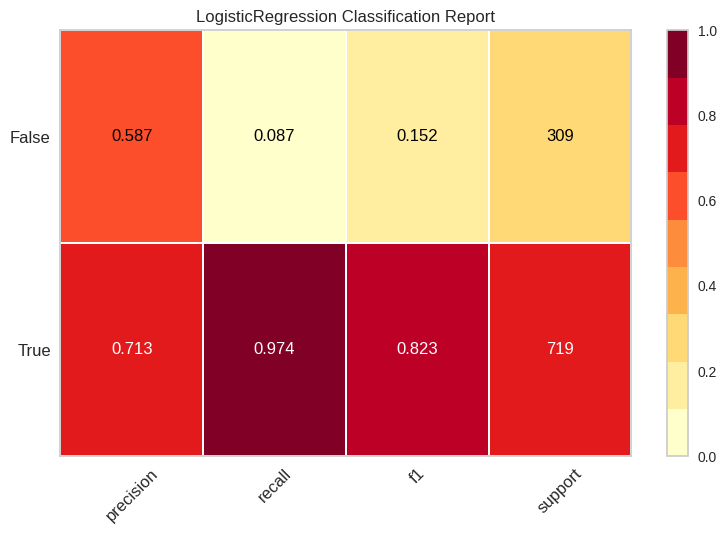

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

classes=[True, False]
# Load the classification dataset
# X, y = load_occupancy()

# # Specify the target classes
# classes = ["unoccupied", "occupied"]

# # Create the training and test data
# tscv = TimeSeriesSplit()
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# # Instantiate the classification model and visualizer
# model = GaussianNB()
visualizer = ClassificationReport(lr, classes=classes, support=True)

visualizer.fit(X_train, Y_train)        # Fit the visualizer and the model
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(, y_pred)

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      0.97      0.82       719
        True       0.59      0.09      0.15       309

    accuracy                           0.71      1028
   macro avg       0.65      0.53      0.49      1028
weighted avg       0.67      0.71      0.62      1028



In [ ]:
# np.isnan(Y)
type(df['P01ARTHOTH'])
type(df['P01ARTDRCV'])
# type(df, 'P01BL12SXL')
# type(df, 'P01BL12SXR')
type(df['P01BMI'])
type(df['P01BROKRCV'])
type(df['P01DADKRCV'])
type(df['P01FAMKR'])
# type(df, 'P01GOUTCV')
type(df['P01HEIGHT'])
type(df['P01KPA30CV'])
# type(df, 'knee_ever_injured_badly')
type(df['P01KPACT30'])
type(df['P01KSX'])
# type(df, 'P01LKP30CV')
# type(df, 'P01LKSX')
# getValues(df, 'ligament_repair')
type(df['P02HISP'])
type(df['P02RACE'])
type(df[['P02SEX']])
# getValues(df, 'V00CHRTHLF')

pandas.core.frame.DataFrame

In [ ]:
# dtype(df['P02HISP'])
df.dtypes

index                      int64
level_0                    int64
ID                        object
VERSION                   object
V00BLDCOLL               float64
                          ...   
right_knee_injury        float64
left_ligament_repair     float64
right_ligament_repair    float64
left_knee                 object
right_knee                object
Length: 1204, dtype: object

In [ ]:
acc = [rfc_acc, knn_acc, accuracy]
maxAcc = max(acc)
for i in range(3):
  if acc[i] == maxAcc and i == 0:
    model = rfc
  elif acc[i] == maxAcc and i == 1:
    model = knn
  elif acc[i] == maxAcc and i == 2:
    model = lr

with open("baseline_features_pickle.pkl", "wb") as f:
  pickle.dump(model, f)

In [ ]:
lr.predict(np.array([[18, 1, 1, 1550, 4, 1, 0, 3, 2]]))

array([False])

In [ ]:
np.array([])

array([], dtype=float64)

In [ ]:
# loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)


In [ ]:
df2.head()

,ID,VERSION,P02HISP,P02RACE,P02SEX,V00CHRTHLF,V00COHORT,V00IMAGESA,V00IMAGESB,V00IMAGESC,...,V08IMAGESE,V08IMAGESF,V08IMAGESG,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG
0,b'9000099',b'25',0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,b'9000296',b'25',0.0,1.0,1.0,1.0,2.0,3.0,0.0,3.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2,b'9000622',b'25',0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,b'9000798',b'25',0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,b'9001104',b'25',0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [ ]:

getValues(df2, 'V08IMAGESG')

V08IMAGESG [ 1.  0. nan]


In [ ]:
type(df2['V00IMAGESA'].iloc[0])

numpy.float64

In [ ]:
df2.columns

Index(['ID', 'VERSION', 'P02HISP', 'P02RACE', 'P02SEX', 'V00CHRTHLF',
       'V00COHORT', 'V00IMAGESA', 'V00IMAGESB', 'V00IMAGESC', 'V00IMAGESD',
       'V00IMAGESE', 'V00IMAGESF', 'V00IMAGESG', 'V00SITE', 'V01HADINTV',
       'V01IMAGESA', 'V01IMAGESB', 'V01IMAGESC', 'V01IMAGESD', 'V01IMAGESE',
       'V01IMAGESF', 'V01IMAGESG', 'V02IMAGESD', 'V03IMAGESA', 'V03IMAGESB',
       'V03IMAGESC', 'V03IMAGESD', 'V03IMAGESE', 'V03IMAGESF', 'V03IMAGESG',
       'V04IMAGESG', 'V05IMAGESA', 'V05IMAGESB', 'V05IMAGESC', 'V05IMAGESD',
       'V05IMAGESE', 'V05IMAGESF', 'V05IMAGESG', 'V06IMAGESA', 'V06IMAGESB',
       'V06IMAGESC', 'V06IMAGESD', 'V06IMAGESE', 'V06IMAGESF', 'V06IMAGESG',
       'V08IMAGESA', 'V08IMAGESB', 'V08IMAGESC', 'V08IMAGESD', 'V08IMAGESE',
       'V08IMAGESF', 'V08IMAGESG', 'V10IMAGESA', 'V10IMAGESB', 'V10IMAGESC',
       'V10IMAGESD', 'V10IMAGESE', 'V10IMAGESF', 'V10IMAGESG'],
      dtype='object')

In [ ]:
getValues(df2, 'V00CHRTHLF')


V00CHRTHLF [2. 1.]


In [ ]:
getValues(df, 'P01OAGRDL')

P01OAGRDL [ 4.  1.  0.  3.  2. nan]


In [ ]:
df[['P01OAGRDL', 'P01OAGRDR']]

,P01OAGRDL,P01OAGRDR
0,4.0,3.0
1,1.0,2.0
2,0.0,2.0
3,4.0,2.0
4,0.0,4.0
...,...,...
4104,2.0,0.0
4105,3.0,1.0
4106,2.0,3.0
4107,2.0,2.0


In [ ]:
df.head()

,index,level_0,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee_injury,right_knee_injury,left_ligament_repair,right_ligament_repair,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,2.0,True,False,False,1.0,0.0,0.0,NaN,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,False,False,False,0.0,0.0,NaN,NaN,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,True,False,False,1.0,0.0,0.0,NaN,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,3.0,False,False,False,0.0,0.0,NaN,NaN,None,None


In [ ]:
df['left_knee_injury'].isna().sum()

35

In [ ]:
# df['left_knee_injury'] = df['left_knee_injury'].dropna()
dropNa(df, 'left_knee_injury')

In [ ]:
df['left_knee_injury'].isna().sum()

0

In [ ]:
df['left_knee_disease'] = (df.kl_left == 0)

In [ ]:
df['left_knee_disease'].unique()

array([False,  True])

In [ ]:
Y = df[['left_knee_disease']].values
# X = df[['left_knee_injury', 'left_ligament_repair', ]]
# X = df[['P01BMI', 'P01BROKRCV', 'P01DADKRCV', 'P01FAMKR', 'P01KSX',
#            'P01HEIGHT', 'P01KPA30CV', 'left_knee_injury', 'P01KPACT30',
#        'P01LKP30CV', 'P02HISP', 'P02RACE', 'P02SEX']].values
X = df[['P01BMI', 'P01DADKRCV', 'P01FAMKR', 'P01HEIGHT', 'P01KSX', 'P01KPACT30',
        'P02HISP', 'P02RACE', 'P02SEX', 'P01BROKRCV', 'P01KPA30CV', 'P01ARTDRCV']].values


In [ ]:
# df['left_knee_injury'] = df['P01INJL']
# df['right_knee_injury'] = df['P01INJR']
# df['left_ligament_repair'] = df['P01LRL']
# df['right_ligament_repair'] = df['P01LRR']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)#, test_size = 0.3

In [ ]:
lr = linear_model.LogisticRegression()
lr.fit(X, Y)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


63.297350343473994

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(Y_test, Y_pred)
print(round(rfc_acc, 2))

<ipython-input-191-ea31dbe4ed36>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


0.59


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, y_pred)
knn_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.60549558390579

# PCA

In [ ]:
df_ = df
df_.head()

,index,level_0,ID,VERSION,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,...,P02RACE,P02SEX,V00CHRTHLF,kl_left,kl_right,knee_ever_injured_badly,ligament_repair,no_disease,left_knee,right_knee
0,0,0,9000099,b'0.2.3',1.0,35400.0,NaN,1.0,NaN,NaN,...,1.0,1.0,2.0,3.0,2.0,True,False,False,None,None
1,1,1,9000296,b'0.2.3',1.0,30780.0,NaN,1.0,NaN,NaN,...,1.0,1.0,1.0,3.0,2.0,True,False,False,None,None
2,2,2,9000622,b'0.2.3',1.0,33900.0,NaN,1.0,NaN,NaN,...,1.0,2.0,2.0,1.0,1.0,False,False,False,None,None
3,3,3,9000798,b'0.2.3',1.0,26400.0,NaN,1.0,NaN,NaN,...,1.0,1.0,1.0,4.0,1.0,True,False,False,None,None
4,4,4,9001104,b'0.2.3',1.0,35100.0,NaN,1.0,NaN,NaN,...,1.0,2.0,2.0,1.0,3.0,False,False,False,None,None


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]


array([[-9.84976771e-01, -1.40010634e-01, -1.77860750e-01,
        -4.11892662e-01,  1.34550350e+00,  1.39736628e+00,
         1.34199640e+00,  1.15012227e+00,  1.65700634e+00,
         8.10465816e-01, -1.79311811e-01, -1.07566978e-01,
        -4.06408213e-01, -1.18980581e+00,  1.13540147e+00],
       [ 2.61730692e-01, -1.40010634e-01, -1.77860750e-01,
        -4.11892662e-01, -1.49992824e+00, -2.52215018e-03,
        -7.45158484e-01,  1.15012227e+00, -6.03497993e-01,
        -1.23385833e+00, -1.79311811e-01, -1.07566978e-01,
        -4.06408213e-01, -1.18980581e+00, -8.80745736e-01],
       [-1.21353981e+00, -1.40010634e-01, -1.77860750e-01,
        -4.11892662e-01,  2.07330801e-01, -1.02802181e+00,
         1.34199640e+00, -8.69472775e-01,  1.65700634e+00,
        -1.23385833e+00, -1.79311811e-01, -1.07566978e-01,
        -4.06408213e-01,  8.40473289e-01,  1.13540147e+00],
       [ 8.01970593e-01, -1.40010634e-01, -1.77860750e-01,
         2.42781698e+00,  2.07330801e-01,  1.15319969

In [ ]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]


array([[ 1.00024343e+00, -2.15074295e-02,  2.85201587e-02,
         1.48282745e-02,  1.57476277e-01,  4.19887919e-03,
         1.30934428e-01,  4.84279469e-02,  1.42248141e-01,
         1.12871536e-01,  1.61681924e-02, -5.65926509e-03,
         1.80417835e-01, -4.26813015e-02,  3.30843378e-02],
       [-2.15074295e-02,  1.00024343e+00, -1.46262748e-02,
         3.40002941e-01, -1.73705770e-02, -1.68010763e-02,
        -4.45721284e-03,  1.07013085e-02,  3.64249904e-03,
        -1.33388971e-02,  5.50062825e-03,  1.60663023e-03,
        -6.04940658e-04,  2.05278152e-02, -1.82573681e-03],
       [ 2.85201587e-02, -1.46262748e-02,  1.00024343e+00,
         4.31918465e-01,  3.20639044e-02,  1.44290824e-02,
         4.51829275e-05,  3.92220438e-02,  4.34439497e-03,
         5.63522882e-03, -7.51816887e-03, -5.85860471e-03,
        -4.02658279e-02, -5.27420101e-03,  1.69587973e-02],
       [ 1.48282745e-02,  3.40002941e-01,  4.31918465e-01,
         1.00024343e+00,  2.09031086e-02, -2.74630871

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]


array([2.58155655, 1.83015591, 1.54363432, 0.18794886, 0.25717572])

In [ ]:
vectors[:5]


array([[ 1.88287568e-01, -3.13994908e-03, -2.25289259e-03,
        -1.21733612e-02, -5.27285872e-02, -1.57459567e-02,
        -8.45627613e-03,  2.92662171e-01, -3.57619513e-01,
         1.26810198e-01, -7.88783131e-01,  3.99252526e-02,
         1.92482808e-01, -1.93555098e-01, -1.82688725e-01],
       [-4.76358061e-03, -5.76869737e-02, -4.24950666e-01,
        -5.31357284e-03,  2.23272247e-03, -1.66251311e-02,
         4.39665171e-01,  4.99403537e-02,  3.13152647e-03,
         1.02173052e-01, -1.35278985e-01,  9.46711630e-02,
        -3.65351150e-01,  6.02901285e-01, -2.92016683e-01],
       [ 2.49084254e-02, -1.18340036e-02, -5.56785782e-01,
        -2.28123639e-03,  9.14552161e-03, -6.56390885e-02,
         5.55114501e-01, -4.93223308e-02, -1.38478575e-03,
        -7.94648852e-02,  9.85486347e-02, -1.16478791e-01,
         3.05587165e-01, -4.48145587e-01,  2.24573537e-01],
       [ 3.08540926e-02, -8.26298766e-02, -7.02313822e-01,
        -2.92925992e-03,  2.34482149e-03,  3.91659170

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances), '\n', explained_variances)


1.0 
 [0.17206188535579076, 0.12198070086685632, 0.10288390978980233, 0.012526874809961525, 0.01714087553701162, 0.02363248195012969, 0.029396325900631196, 0.04490987159489453, 0.08407689496879106, 0.053629570425073166, 0.06039548086961349, 0.07307954058796089, 0.07051176773780167, 0.06734316248794162, 0.06643065711774028]


In [ ]:
for _ in range(len(values)):
  print(features[_], explained_variances[_])

[-0.98497677  0.26173069 -1.21353981 ... -1.00575523 -0.73563528
 -0.46551533] 0.17206188535579076
[-0.14001063 -0.14001063 -0.14001063 ... -0.14001063 -0.14001063
 -0.14001063] 0.12198070086685632
[-0.17786075 -0.17786075 -0.17786075 ... -0.17786075 -0.17786075
 -0.17786075] 0.10288390978980233
[-0.41189266 -0.41189266 -0.41189266 ... -0.41189266 -0.41189266
 -0.41189266] 0.012526874809961525
[ 1.3455035  -1.49992824  0.2073308  ... -0.36175555 -1.49992824
 -1.49992824] 0.01714087553701162
[ 1.39736628 -0.00252215 -1.02802181 ... -0.49085532 -1.21792916
 -0.06220732] 0.02363248195012969
[ 1.3419964  -0.74515848  1.3419964  ... -0.74515848 -0.74515848
 -0.74515848] 0.029396325900631196
[ 1.15012227  1.15012227 -0.86947277 ... -0.86947277 -0.86947277
 -0.86947277] 0.04490987159489453
[ 1.65700634 -0.60349799  1.65700634 ... -0.60349799 -0.60349799
 -0.60349799] 0.08407689496879106
[ 0.81046582 -1.23385833 -1.23385833 ...  0.81046582 -1.23385833
 -1.23385833] 0.053629570425073166
[-0.179

In [ ]:
# 'P01BL12SXL', 'P01BL12SXR',
x = df[['P01BL12SXL', 'P01BL12SXR','knee_ever_injured_badly', 'P01BMI', 'P01BROKRCV', 'P01DADKRCV', 'P01FAMKR', 'P01KSX', 'P01LKP30CV', 'ligament_repair', 'P02RACE', 'P02SEX']].values
y  = df[['P01ARTDRCV']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = True)#, test_size = 0.3


In [ ]:
rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, y_pred)
print(round(rfc_acc, 2))

<ipython-input-114-02860a037f2f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


0.94


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.953307392996109

In [ ]:
lr = linear_model.LogisticRegression()
lr.fit(x, y)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


95.3307392996109

In [ ]:
xgbcl = XGBRFClassifier()
xgbcl.fit(X_train, Y_train)
y_xgbcl = xgbcl.predict(X_test)
xgbcl_acc = accuracy_score(Y_test, y_pred)
xgbcl_acc

0.7013618677042801

In [ ]:
getValues(df2, 'V01HADINTV')

V01HADINTV [2. 0. 1.]


In [ ]:
# xray_data = pd.read_sas('drive/MyDrive/KneeOA_final_datasets/xray00.sas7bdat')
# xray_data = pd.read_sas('drive/MyDrive/KneeOA_final_datasets/kxr_sq_bu00.sas7bdat')

In [ ]:
# pip install pyreadstat

In [ ]:
import pyreadstat

ModuleNotFoundError: ignored

In [ ]:
# xray_data = pd.read_sas('drive/MyDrive/KneeOA_final_datasets/XRay00.xpt')
# xray_data, meta = pyreadstat.read_sas7bdat('drive/MyDrive/KneeOA_final_datasets/xray01.sas7bdat')

In [ ]:
# pip install sas7bdat

In [ ]:
from sas7bdat import SAS7BDAT
xray = SAS7BDAT("drive/MyDrive/KneeOA_final_datasets/xray01.sas7bdat")

In [ ]:
SAS7BDAT('drive/MyDrive/KneeOA_final_datasets/xray01.sas7bdat', skip_header=True)
# with SAS7BDAT('drive/MyDrive/KneeOA_final_datasets/xray01.sas7bdat', skip_header=True) as reader:
#     for row in reader:
#         print(row)


In [ ]:
pd.read_sas('drive/MyDrive/KneeOA_final_datasets/flxr_kneealign_cooke01.sas7bdat')

In [ ]:
kl_grades = pd.read_csv('drive/MyDrive/KneeOA_final_datasets/kxr_sq_bu00.csv')

In [ ]:
kl_grades.head()

In [ ]:
kl_grades[['ID', 'SIDE', 'V00XRKL']]

In [ ]:
kl_grades['SIDE'].unique()

In [ ]:
kl_grades[kl_grades['ID'] == 9001897][['ID', 'SIDE', 'V00XRKL']]

In [ ]:
df.head()